### Medias moveis Bitcoin

In [13]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error , mean_absolute_error
import plotly.graph_objects as go
from pandas_datareader import data
import datetime as dt
import math
%matplotlib inline

In [2]:
tickers = ['AAPL', 'MSFT', '^GSPC']

start_date = '2014-09-17'
end_date = '2021-07-25'

df = data.DataReader('BTC-USD', 'yahoo', start_date, end_date)

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-07-20,32752.326172,29526.183594,29796.285156,32110.693359,2.820302e+10,32110.693359
2021-07-21,32576.400391,31745.298828,32138.873047,32313.105469,1.955523e+10,32313.105469
2021-07-22,33581.550781,32057.892578,32305.958984,33581.550781,2.255205e+10,33581.550781


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-20,32752.326172,29526.183594,29796.285156,32110.693359,2.820302e+10,32110.693359
2021-07-21,32576.400391,31745.298828,32138.873047,32313.105469,1.955523e+10,32313.105469
2021-07-22,33581.550781,32057.892578,32305.958984,33581.550781,2.255205e+10,33581.550781
2021-07-23,34490.390625,33424.859375,33593.730469,34292.445312,2.166471e+10,34292.445312
2021-07-26,38693.976562,35287.312500,35287.312500,38127.808594,3.285852e+10,38127.808594


In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


#### Reantabilidade

In [6]:
df['rentabilidade'] = df['Close'] /  df['Close'].shift() * 100 - 100

In [7]:
df

,High,Low,Open,Close,Volume,Adj Close,rentabilidade
Date,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,NaN
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,-7.192558
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,-6.984265
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,3.573492
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,-2.465854
...,...,...,...,...,...,...,...
2021-07-20,32752.326172,29526.183594,29796.285156,32110.693359,2.820302e+10,32110.693359,7.727443
2021-07-21,32576.400391,31745.298828,32138.873047,32313.105469,1.955523e+10,32313.105469,0.630357
2021-07-22,33581.550781,32057.892578,32305.958984,33581.550781,2.255205e+10,33581.550781,3.925483


In [8]:
df['mv_7'] = df['Close'].rolling(7).mean()
df['mv_21'] = df['Close'].rolling(21).mean()
df['mv_50'] = df['Close'].rolling(50).mean()
df['mv_200'] = df['Close'].rolling(200).mean()

In [9]:
df

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7,mv_21,mv_50,mv_200
Date,,,,,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,-7.192558,NaN,NaN,NaN,NaN
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,-6.984265,NaN,NaN,NaN,NaN
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,3.573492,NaN,NaN,NaN,NaN
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,-2.465854,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-20,32752.326172,29526.183594,29796.285156,32110.693359,2.820302e+10,32110.693359,7.727443,31324.003069,32935.540551,34606.321328,44693.831787
2021-07-21,32576.400391,31745.298828,32138.873047,32313.105469,1.955523e+10,32313.105469,0.630357,31400.056641,32875.587612,34501.079844,44691.487197
2021-07-22,33581.550781,32057.892578,32305.958984,33581.550781,2.255205e+10,33581.550781,3.925483,31708.629743,32860.563988,34388.535547,44699.535381


In [10]:
df['rentabilidade']

Date
2014-09-16          NaN
2014-09-17    -7.192558
2014-09-18    -6.984265
2014-09-19     3.573492
2014-09-20    -2.465854
                ...    
2021-07-20     7.727443
2021-07-21     0.630357
2021-07-22     3.925483
2021-07-23     2.116920
2021-07-26    11.184281
Name: rentabilidade, Length: 2500, dtype: float64

<AxesSubplot:xlabel='Date'>

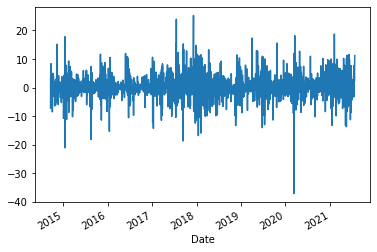

In [11]:
df['rentabilidade'].plot()

In [12]:
df[df['mv_7'] > df['mv_200']]

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7,mv_21,mv_50,mv_200
Date,,,,,,,,,,,
2015-06-30,265.171997,255.774002,263.345001,258.621002,2.702980e+07,258.621002,-1.691928,252.164427,244.874047,237.781960,251.290385
2015-07-01,261.631012,254.115997,258.552002,255.412003,2.155190e+07,255.412003,-1.240812,253.966285,246.098190,238.162660,250.809285
2015-07-02,257.076996,253.505005,255.459000,256.335999,1.903380e+07,256.335999,0.361767,255.786571,247.353143,238.550800,250.364240
2015-07-03,261.457001,254.199997,256.490997,260.885986,1.562040e+07,260.885986,1.775009,257.200283,248.709524,239.016420,250.033360
2015-07-04,274.506012,258.700989,260.804993,271.912994,4.415610e+07,271.912994,4.226754,260.471996,250.536666,239.731620,249.794045
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,45812.457031,42367.832031,43488.058594,42909.402344,5.618737e+10,42909.402344,-1.442686,46915.774554,53348.131510,55764.377969,39711.683198
2021-05-18,43546.117188,30681.496094,42944.976562,37002.441406,1.263581e+11,37002.441406,-13.766123,45180.332589,52499.452381,55326.072969,39827.790430
2021-05-19,42462.984375,35050.617188,36753.667969,40782.738281,8.828194e+10,40782.738281,10.216344,43904.125000,51891.244234,54963.351094,39963.018574


In [14]:
filter_data = df['mv_7'] > df['mv_200']

In [15]:
def extracao(df):
    df.reset_index(inplace=True)
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day

In [16]:
extracao(df)
df.set_index(['Date'], inplace=True)

In [17]:
df

,High,Low,Open,Close,Volume,Adj Close,rentabilidade,mv_7,mv_21,mv_50,mv_200,year,month,day
Date,,,,,,,,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,NaN,NaN,NaN,NaN,NaN,2014,9,16
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,-7.192558,NaN,NaN,NaN,NaN,2014,9,17
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,-6.984265,NaN,NaN,NaN,NaN,2014,9,18
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,3.573492,NaN,NaN,NaN,NaN,2014,9,19
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,-2.465854,NaN,NaN,NaN,NaN,2014,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-20,32752.326172,29526.183594,29796.285156,32110.693359,2.820302e+10,32110.693359,7.727443,31324.003069,32935.540551,34606.321328,44693.831787,2021,7,20
2021-07-21,32576.400391,31745.298828,32138.873047,32313.105469,1.955523e+10,32313.105469,0.630357,31400.056641,32875.587612,34501.079844,44691.487197,2021,7,21
2021-07-22,33581.550781,32057.892578,32305.958984,33581.550781,2.255205e+10,33581.550781,3.925483,31708.629743,32860.563988,34388.535547,44699.535381,2021,7,22


<AxesSubplot:xlabel='day'>

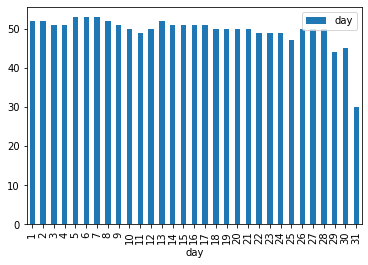

In [18]:
df[filter_data].groupby('day').agg({'day':'count'}).plot(kind='bar')

In [20]:
df[filter_data].groupby('month').size()

month
1     126
2     140
3     115
4     117
5     145
6     121
7     155
8     141
9     118
10    106
11    128
12    124
dtype: int64

<AxesSubplot:xlabel='month'>

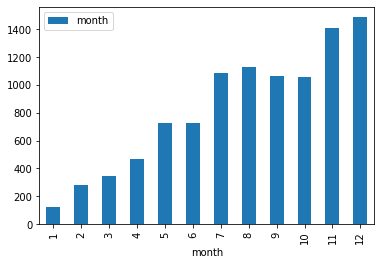

In [21]:
df[filter_data].groupby('month').agg({'month':'sum'}).plot(kind='bar')

<AxesSubplot:xlabel='month'>

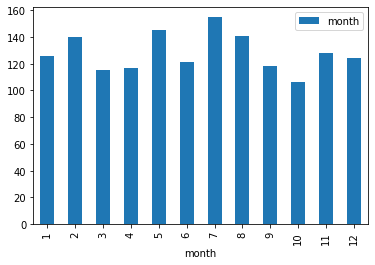

In [22]:
df[filter_data].groupby('month').agg({'month':'count'}).plot(kind='bar')

<AxesSubplot:xlabel='year'>

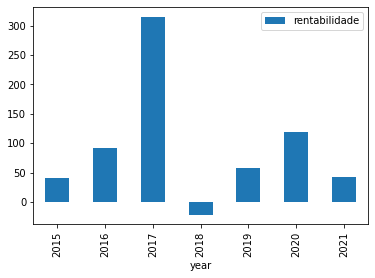

In [24]:
df[filter_data].groupby('year').agg({'rentabilidade':'sum'}).plot(kind='bar')

<AxesSubplot:xlabel='year'>

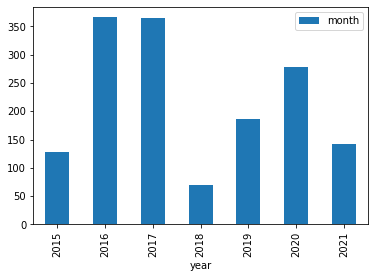

In [33]:
df[filter_data].groupby('year').agg({'month':'count'}).plot(kind='bar')